In [2]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# create a random matrix of size m x n with the rank <= k <= min(m, n).
def create_random_matrix(m: int, n: int, k: int) -> np.ndarray:
    if k > min(m, n):
        raise ValueError("k must be less than or equal to min(n, m)")
    A = np.random.randn(m, k)
    B = np.random.randn(k, n)
    return A@B

In [14]:
m = 10
n = 8

n_repeats = 1000

true_ranks = []
estimated_ranks = []
u_orthogonality_errors = []
v_orthogonality_errors = []
svd_errors = []

for _ in range(n_repeats):
    k = np.random.randint(1, min(m, n) + 1)
    A = create_random_matrix(m, n, k)
    U, s, Vh = np.linalg.svd(A, full_matrices=False)

    true_ranks.append(k)
    estimated_ranks.append(np.sum(s > 1e-10))
    u_orthogonality_errors.append(np.linalg.norm(U.T @ U - np.eye(min(m,n))))
    v_orthogonality_errors.append(np.linalg.norm(Vh @ Vh.T - np.eye(min(m,n))))
    svd_errors.append(np.linalg.norm(A - U @ np.diag(s) @ Vh))

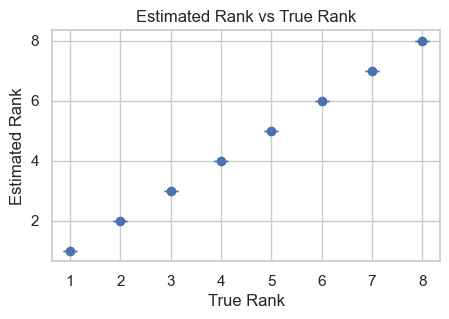

In [15]:
# plot how well the rank was estimated.
# for each true rank, plot the average and standard deviation of the estimated rank.
unique_true_ranks = np.unique(true_ranks)
avg_estimated_ranks = []
std_estimated_ranks = []

for r in unique_true_ranks:
    avg_estimated_ranks.append(np.mean([estimated_ranks[i] for i in range(n_repeats) if true_ranks[i] == r]))
    std_estimated_ranks.append(np.std([estimated_ranks[i] for i in range(n_repeats) if true_ranks[i] == r]))

sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
plt.errorbar(unique_true_ranks, avg_estimated_ranks, yerr=std_estimated_ranks, fmt='o', capsize=5)
plt.xlabel('True Rank')
plt.ylabel('Estimated Rank')
plt.title('Estimated Rank vs True Rank')
plt.xticks(unique_true_ranks)
plt.grid(True)
plt.show()

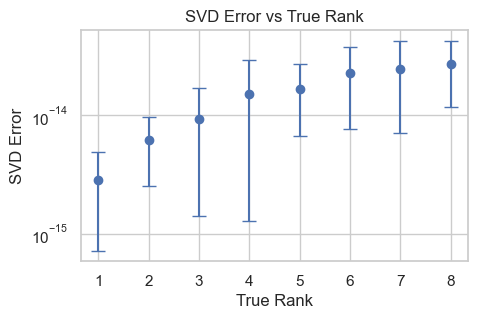

In [16]:
# plot how well the svd error was estimated.
# for each true rank, plot the average and standard deviation of the svd error.
unique_true_ranks = np.unique(true_ranks)
avg_svd_errors = []
std_svd_errors = []
for r in unique_true_ranks:
    avg_svd_errors.append(np.mean([svd_errors[i] for i in range(n_repeats) if true_ranks[i] == r]))
    std_svd_errors.append(np.std([svd_errors[i] for i in range(n_repeats) if true_ranks[i] == r]))

sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
plt.errorbar(unique_true_ranks, avg_svd_errors, yerr=std_svd_errors, fmt='o', capsize=5)
plt.xlabel('True Rank')
plt.ylabel('SVD Error')
plt.title('SVD Error vs True Rank')
plt.xticks(unique_true_ranks)
plt.yscale('log')
plt.grid(True)
plt.show()

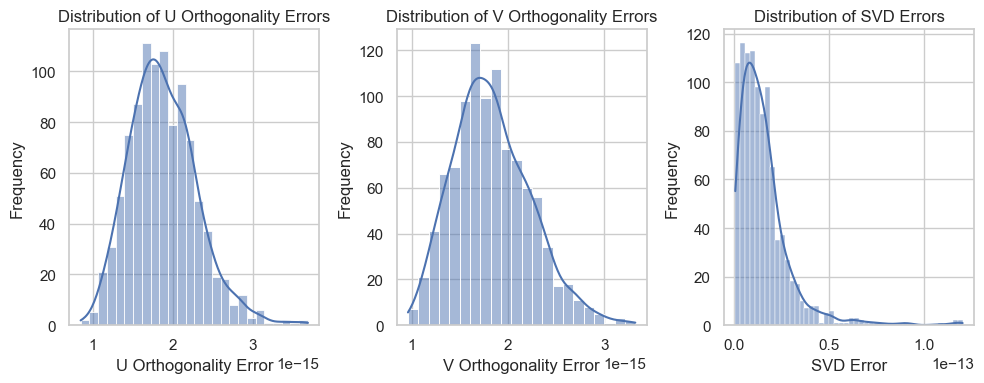

In [17]:
# plot the distribution of the orthogonality errors of u and v, and the SVD error.
# the histograms should be plotted separately.
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(u_orthogonality_errors, kde=True)
plt.xlabel('U Orthogonality Error')
plt.ylabel('Frequency')
plt.title('Distribution of U Orthogonality Errors')
plt.subplot(1, 3, 2)
sns.histplot(v_orthogonality_errors, kde=True)
plt.xlabel('V Orthogonality Error')
plt.ylabel('Frequency')
plt.title('Distribution of V Orthogonality Errors')
plt.subplot(1, 3, 3)
sns.histplot(svd_errors, kde=True)
plt.xlabel('SVD Error')
plt.ylabel('Frequency')
plt.title('Distribution of SVD Errors')
plt.tight_layout()
plt.show()